The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-5.15, -2.  ]), array([-3.70084657, -0.13943436]), array([-3.20816133,  0.67829618]), array([-2.5341087 ,  1.27714819]), array([-2.32557424,  1.17798167]), array([-2.04855145,  1.26571597]), array([-1.98032704,  1.07289556]), array([-1.84558146,  1.06721295]), array([-1.82070576,  0.93560674]), array([-1.74343253,  0.92687582]), array([-1.73209984,  0.84803827]), array([-1.68397879,  0.84455323]), array([-1.67788739,  0.7971569 ]), array([-1.64688812,  0.79644788]), array([-1.64331961,  0.76709841]), array([-1.6230427 ,  0.76735616]), array([-1.62085636,  0.7486942 ]), array([-1.60748133,  0.74916863]), array([-1.60610461,  0.7370808 ]), array([-1.59723545,  0.73752193]), array([-1.59635207,  0.7295976 ]), array([-1.59045008,  0.72994439]), array([-1.58987562,  0.72470928]), array([-1.5859388 ,  0.72496339]), array([-1.58556166,  0.72148765]), array([-1.58293145,  0.72166732

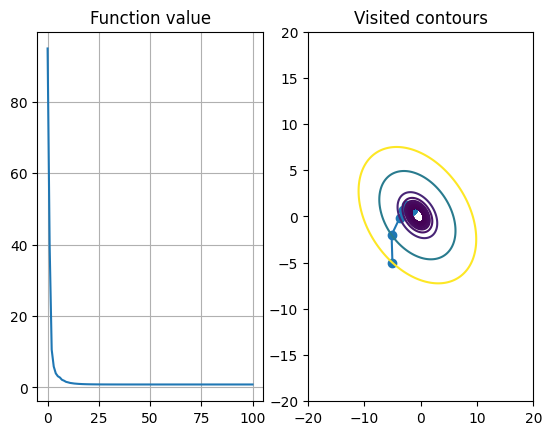

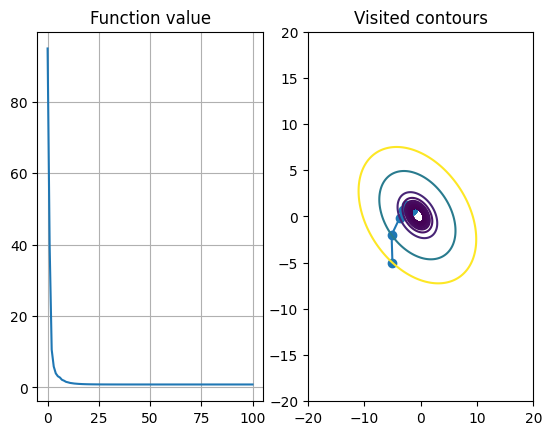

In [26]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi=SearchRegion2d((-20, 20), (-20, 20))

def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x**2 + b * y**2 + c * x*y + d * x + e * y
    return func

def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])
    return func

f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)

def sum_funcs(f, g):
    return lambda x: f(x) + g(x)

#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
points = gradient_descent_minibatch_with_momentum(0.5)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

